In [8]:
import pandas as pd 
import numpy as py 
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
file_to_load = 'CPIninety_six_df.csv'
data = pd.read_csv(file_to_load)
data

,Unnamed: 0,Unnamed: 0.1,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier,CPI_Multiplier,CPIAdjPrice,CROPADJ
0,26163,188790,10317829,FLORIDA,1993,March,"TORNADOES, TSTM WIND, HAIL",0,0,25,0,1.600000e+09,2500000.0,0.0,CSV,1000000000,1000000,1.769253,2.830804e+09,4.423131e+06
1,37804,215779,10338716,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREES,0,0,0,0,2.000000e+03,0.0,0.0,CSV,1000,1,1.677539,3.355079e+03,0.000000e+00
2,38225,216743,10337585,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREE,0,0,0,0,1.000000e+03,0.0,0.0,CSV,1000,1,1.677539,1.677539e+03,0.000000e+00
3,38227,216745,10337587,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREES,0,0,0,0,1.000000e+03,0.0,0.0,CSV,1000,1,1.677539,1.677539e+03,0.000000e+00
4,38228,216746,10337588,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREES,0,0,0,0,2.000000e+03,0.0,0.0,CSV,1000,1,1.677539,3.355079e+03,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118387,380959,1602127,857515,VIRGINIA,2019,September,Tropical Storm,0,0,0,0,1.000000e+04,0.0,NaN,CSV,1000,1000,1.000000,1.000000e+04,0.000000e+00
118388,380960,1602128,857520,VIRGINIA,2019,September,Tropical Storm,0,0,0,0,1.500000e+04,0.0,NaN,CSV,1000,1000,1.000000,1.500000e+04,0.000000e+00
118389,380961,1602136,858098,CALIFORNIA,2019,September,Strong Wind,0,0,0,0,2.000000e+03,0.0,35.0,CSV,1000,1000,1.000000,2.000000e+03,0.000000e+00
118390,380964,1602162,857521,VIRGINIA,2019,September,Tropical Storm,0,0,0,0,1.000000e+04,0.0,NaN,CSV,1000,1000,1.000000,1.000000e+04,0.000000e+00


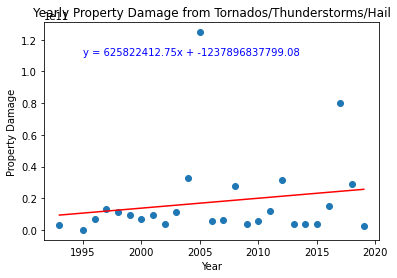

In [16]:
yearly_df = data.groupby('YEAR')
years =yearly_df['YEAR'].unique()
pdamage = yearly_df['CPIAdjPrice'].sum()
#cdamage = yearly_df.CROPADJ.array

plt.scatter(years, pdamage)
(slope, intercept, rvalue, pvalue, stderr) = linregress(years.astype(float), pdamage)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1995,110000000000),fontsize=10,color="blue")
#plt.plot(x_axis,regress_values,"r-")
plt.plot(years, intercept + slope*years, 'r', label='fitted line')

plt.xlabel("Year") 
plt.ylabel("Property Damage") 
plt.title("Yearly Property Damage from Tornados/Thunderstorms/Hail") 
plt.show() 

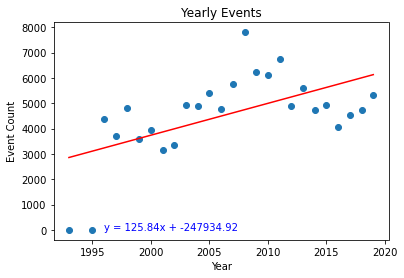

In [20]:
yearly_df = data.groupby('YEAR')
years =yearly_df['YEAR'].unique()
pdamage = yearly_df['EVENT_TYPE'].count()
#cdamage = yearly_df.CROPADJ.array

plt.scatter(years, pdamage)
(slope, intercept, rvalue, pvalue, stderr) = linregress(years.astype(float), pdamage)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1996,1),fontsize=10,color="blue")
#plt.plot(x_axis,regress_values,"r-")
plt.plot(years, intercept + slope*years, 'r', label='fitted line')
#plt.ylim(0,15000)
plt.xlabel("Year") 
plt.ylabel("Event Count") 
plt.title("Yearly Events") 
plt.show() 
